In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2021-11-29 10:02:30--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-11-29 10:02:31 (35.9 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 29.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from scipy.stats import boxcox

In [4]:
df = pd.read_csv('/content/airline_passengers.csv', index_col ='Month', parse_dates = True)

In [5]:
import pmdarima as pm

In [6]:
df['LogPassengers'] = np.log(df['Passengers'])

In [7]:
Ntest  = 12 
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [8]:
model = pm.auto_arima(train['Passengers'],
                     trace=True,
                     suppress_warnings=True,
                     seasonal=True,m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.42 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.59 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.33 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.63 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.15 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.46 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 29 Nov 2021   AIC                            905.686
Time:                                    10:03:55   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

In [11]:
test_pred

array([419.967172  , 399.84985049, 457.99438118, 444.47415565,
       464.78917863, 514.12544051, 587.8041693 , 597.01082232,
       499.53126876, 442.35967856, 396.41021685, 438.65159514])

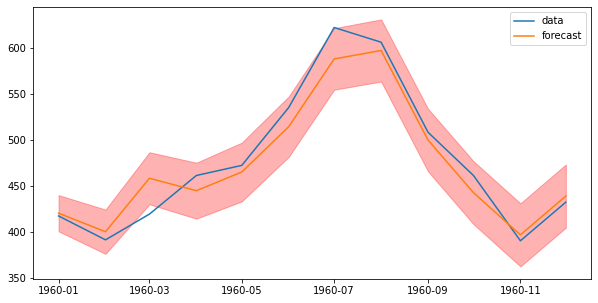

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Passengers'], label= 'data')
ax.plot(test.index, test_pred, label='forecast')

ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha = 0.3)
ax.legend()

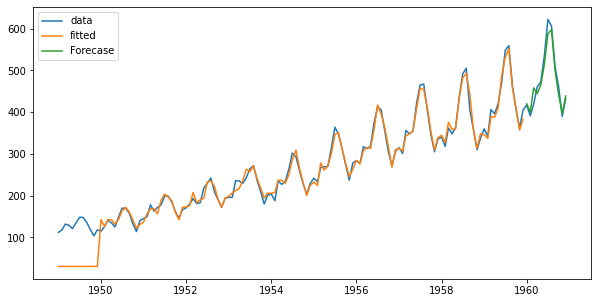

In [17]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Passengers'], label = 'data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label ='Forecase')

ax.legend()

LogModel , after log transformation 

In [25]:
logmodel = pm.auto_arima(train['LogPassengers'],
                        trace=True,
                        suppress_warnings=True,
                        seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.663, Time=2.65 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.74 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=2.15 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=1.07 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=5.49 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=2.03 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.36 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.502, Time=1.86 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.55 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-441.068, Time=2.16 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.512, Time=7.60 sec
 ARIMA(1,0,2)(1,1,0)[12]

KeyboardInterrupt: ignored

In [26]:
test_pred, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
test_pred

array([6.04404393, 5.99658441, 6.15439432, 6.12926385, 6.17064575,
       6.3167032 , 6.44589786, 6.45908194, 6.28095311, 6.15094354,
       6.02307142, 6.13006485])

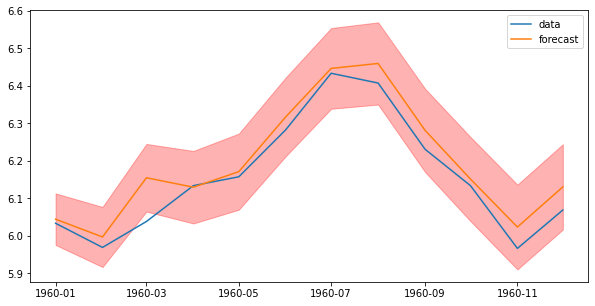

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label= 'data')
ax.plot(test.index, test_pred, label='forecast')

ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha = 0.3)
ax.legend()

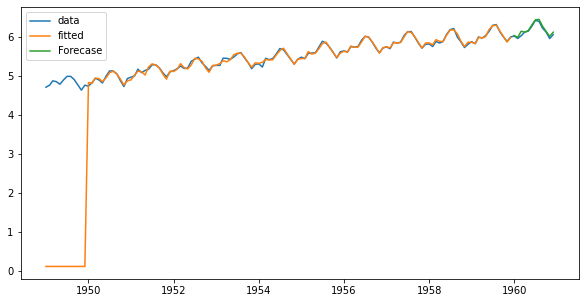

In [30]:
train_pred = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label = 'data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label ='Forecase')

ax.legend()